# Create a Psychedelia Bitmap from a Raw Image

Download the image

In [22]:
! curl https://4.bp.blogspot.com/-mbHVVDRQUeE/WH-mlZEx3GI/AAAAAAAADwM/57AE2Zd555s4eo6i7iox1skKDDkxLKuPwCLcB/s1600/julia_1.png -o julia.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  253k  100  253k    0     0  1399k      0 --:--:-- --:--:-- --:--:-- 1406k


Load it and resize it

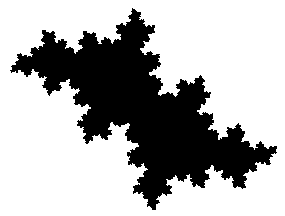

In [35]:
import numpy as np
from PIL import Image
thresh = 200
fn = lambda x : 255 if x > thresh else 0

img = Image.open('julia.png')
img = img.convert('L').point(fn, mode='1').resize((int(img.width/3),int(img.height/3)))
img

Convert the image to a bitmap of 0s and 1s

In [43]:
img_data = list(img.getdata())
img_array = []
for i in range(0,len(img_data), img.width):
    img_array += [(0 if p == 255 else 1) for p in img_data[i:i+img.width]]
    print(''.join([str((0 if p == 255 else 1)) for p in img_data[i:i+img.width]]))

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

Filter the bitmap to just the pixels that plot the edge of the image

In [44]:
import math

pixel_indices = []
pv = 0
for i,v in enumerate(img_array):
    last_two = pv+v
    if last_two == 1:
        pixel_indices += [i]
    pv = v

pixel_x_ys = [(p%img.width, math.floor(p/img.width)) for p in pixel_indices]
len(pixel_x_ys)

1090

Convert the bitmap to the format required by Psychedelia

In [46]:
origin = (int(img.width/2), int(img.height/2))
x_origin, y_origin = origin
x_array, y_array = [],[]
for x,y in pixel_x_ys:
    x_array += [x - x_origin]
    y_array += [y - y_origin]

x_string,y_string = "",""
for i in range(0, len(x_array), 8):
    x_string += ','.join([str(x) for x in  x_array[i:i+8]])+',0x55,\n'
    y_string += ','.join([str(y) for y in  y_array[i:i+8]])+',0x55,\n'


Write it to a file of its own

In [47]:
pname = "julia"
output_file = open(f'src/patterns/{pname}.js','w')
output_file.write(f'export const xArray = [\n{x_string}];\n\n')
output_file.write(f'export const yArray = [\n{y_string}];\n')
output_file.close()